In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing google drive to access dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import accuracy_score

path_train = '/content/drive/MyDrive/Data/train_data.csv'
train_df = pd.read_csv(path_train)

path_val = '/content/drive/MyDrive/Data/val_data.csv'
val_df = pd.read_csv(path_val)

Imports and getting the dataset ready to be used by the models.

In [ ]:
X = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
y = ['diabetes']

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level
0  36.0             0              0  17.06          4.0                  145
1  58.0             0              0  37.83          6.1                  159
2  43.0             0              0  39.20          5.0                  160
3  67.0             1              0  28.39          5.7                  159
4   5.0             0              0  27.32          6.0                   80

y_train, our output variable:
   diabetes
0         0
1         0
2         0
3         0
4         0


Assigning data to X_train and y_train.

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

In [ ]:
X_val = val_df[X]
y_val = val_df[y]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_adasyn_scaled = scaler.fit_transform(X_adasyn)
X_val_scaled = scaler.transform(X_val)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_train = xgb.DMatrix(X_adasyn, label=y_adasyn)

params = {
    'max_depth': 4, # maximum depth of a tree
    'eta': 0.005,  # kind of like LR for XGBoost
    'silent': 1,  # quiet logging mode
    'objective': 'binary:logistic'
    }

num_round = 5

bst = xgb.train(params, xgb_train, num_round)

[02:51:58] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [ ]:
import joblib

In [ ]:
model_file_path = "xgboost_model.joblib"
joblib.dump(bst, model_file_path)

['xgboost_model.joblib']

In [ ]:
drive.mount('/content/drive')
model_drive_path = "/content/drive/MyDrive/Data/xgboost_model.joblib"
!mv {model_file_path} {model_drive_path}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
xgb_val = xgb.DMatrix(X_val)

y_pred_probs = bst.predict(xgb_val)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.7846


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_val, y_pred)

In [ ]:
cm_df = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])

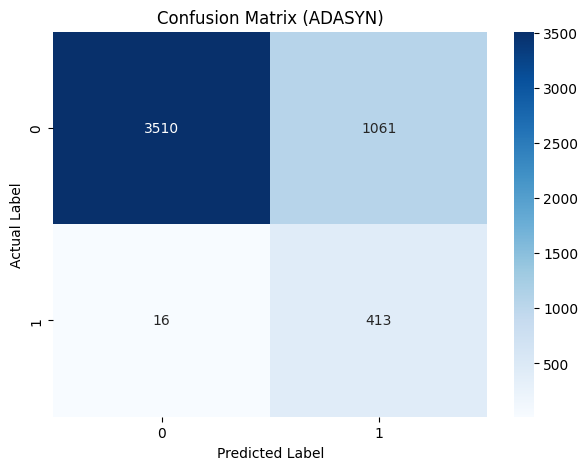

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (ADASYN)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Depth: 4

Eta: 0.01

rounds: 10

Accuracy: 93%


Depth: 4
Eta: 0.005
rounds: 5

Accuracy: 96.3%